In [1]:
# This script introduces some functions and tasks.

In [2]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
df1 = pd.read_csv("abalone_missing.csv")

### 데이터 설명
타겟 데이터   
전복 (Abalone) 고리 수 예측  (Class_number_of_rings) 

|특징 데이터||
|------|---|
|Sex|성별 (M:Male, I:Infant, F:Female)|
|Length|전복 길이|
|Diameter|전복 지름|
|Height|전복 높이|
|Whole_weight|전복 무게|
|Shucked_weight|전복 껍데기를 제외한 무게|
|Viscera_weight|전복 내장 무게|
|Shell_weight|전복 껍데기 무게|
|Class_number_of_rings|전복 고리 수 (Target)|


In [4]:
df1

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,NaN,0.095,0.5140,0.2245,NaN,NaN,15
1,M,0.350,0.265,NaN,0.2255,0.0995,0.0485,NaN,7
2,F,0.530,0.420,NaN,0.6770,0.2565,0.1415,NaN,9
3,NaN,0.440,0.365,0.125,0.5160,0.2155,0.1140,NaN,10
4,I,0.330,0.255,NaN,0.2050,0.0895,0.0395,NaN,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,NaN,0.165,0.8870,0.3700,NaN,NaN,11
4173,M,0.590,0.440,NaN,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,NaN,1.1760,0.5255,NaN,NaN,9
4175,NaN,0.625,0.485,NaN,1.0945,0.5310,0.2610,NaN,10


### How to handle missing values in dataset.

#### Case: Some features have so many missing values

It is difficult to utilize these features.
These features will be removed in advance.

In [5]:
n_sample, n_feature = df1.shape

In [6]:
# get the number of NaN (Not a Number) values for each feature.

In [7]:
df1.isnull()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,False,False,True,False,False,False,True,True,False
1,False,False,False,True,False,False,False,True,False
2,False,False,False,True,False,False,False,True,False
3,True,False,False,False,False,False,False,True,False
4,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,True,False,False,False,True,True,False
4173,False,False,False,True,False,False,False,False,False
4174,False,False,False,True,False,False,True,True,False
4175,True,False,False,True,False,False,False,True,False


In [8]:
df1.isnull().sum()

Sex                       389
Length                    406
Diameter                  440
Height                   2442
Whole_weight              424
Shucked_weight            415
Viscera_weight            431
Shell_weight             2461
Class_number_of_rings       0
dtype: int64

In [9]:
df1.isnull().sum() / n_sample

Sex                      0.093129
Length                   0.097199
Diameter                 0.105339
Height                   0.584630
Whole_weight             0.101508
Shucked_weight           0.099354
Viscera_weight           0.103184
Shell_weight             0.589179
Class_number_of_rings    0.000000
dtype: float64

In [10]:
# remove variables that have missing values more than a half.

In [11]:
(df1.isnull().sum() / n_sample) > 0.5

Sex                      False
Length                   False
Diameter                 False
Height                    True
Whole_weight             False
Shucked_weight           False
Viscera_weight           False
Shell_weight              True
Class_number_of_rings    False
dtype: bool

In [12]:
df1.drop(["Height", "Shell_weight"], axis=1)

,Sex,Length,Diameter,Whole_weight,Shucked_weight,Viscera_weight,Class_number_of_rings
0,M,0.455,NaN,0.5140,0.2245,NaN,15
1,M,0.350,0.265,0.2255,0.0995,0.0485,7
2,F,0.530,0.420,0.6770,0.2565,0.1415,9
3,NaN,0.440,0.365,0.5160,0.2155,0.1140,10
4,I,0.330,0.255,0.2050,0.0895,0.0395,7
...,...,...,...,...,...,...,...
4172,F,0.565,NaN,0.8870,0.3700,NaN,11
4173,M,0.590,0.440,0.9660,0.4390,0.2145,10
4174,M,0.600,0.475,1.1760,0.5255,NaN,9
4175,NaN,0.625,0.485,1.0945,0.5310,0.2610,10


In [13]:
df1

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,NaN,0.095,0.5140,0.2245,NaN,NaN,15
1,M,0.350,0.265,NaN,0.2255,0.0995,0.0485,NaN,7
2,F,0.530,0.420,NaN,0.6770,0.2565,0.1415,NaN,9
3,NaN,0.440,0.365,0.125,0.5160,0.2155,0.1140,NaN,10
4,I,0.330,0.255,NaN,0.2050,0.0895,0.0395,NaN,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,NaN,0.165,0.8870,0.3700,NaN,NaN,11
4173,M,0.590,0.440,NaN,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,NaN,1.1760,0.5255,NaN,NaN,9
4175,NaN,0.625,0.485,NaN,1.0945,0.5310,0.2610,NaN,10


In [14]:
# df1.drop returns a new DataFrame, so we need to update df1.

In [15]:
df1 = df1.drop(["Height", "Shell_weight"], axis=1)

### Case: Each columns has a small amount of missing values.
Then, we just delete samples with missing values.

In [16]:
# the number of null values for each row

In [17]:
df1.isnull().sum(axis=1)

0       2
1       0
2       0
3       1
4       0
       ..
4172    2
4173    0
4174    1
4175    1
4176    0
Length: 4177, dtype: int64

In [18]:
# whether the number of null values for each row is larger than 0

In [19]:
df1.isnull().sum(axis=1) > 0

0        True
1       False
2       False
3        True
4       False
        ...  
4172     True
4173    False
4174     True
4175     True
4176    False
Length: 4177, dtype: bool

In [20]:
# the number of rows that include null values.

In [21]:
(df1.isnull().sum(axis=1) > 0).sum()

1943

In [22]:
# way 1: get indexes of rows that include null values and drop these rows.

In [23]:
df1[df1.isnull().sum(axis=1) > 0]

,Sex,Length,Diameter,Whole_weight,Shucked_weight,Viscera_weight,Class_number_of_rings
0,M,0.455,NaN,0.5140,0.2245,NaN,15
3,NaN,0.440,0.365,0.5160,0.2155,0.1140,10
9,F,0.550,NaN,0.8945,0.3145,0.1510,19
15,M,0.500,0.400,0.6645,NaN,0.1330,12
17,F,NaN,0.340,0.4510,NaN,0.0870,10
...,...,...,...,...,...,...,...
4170,M,0.550,NaN,0.8395,0.3155,0.1955,10
4171,M,0.560,NaN,0.8675,0.4000,0.1720,8
4172,F,0.565,NaN,0.8870,0.3700,NaN,11
4174,M,0.600,0.475,1.1760,0.5255,NaN,9


In [24]:
null_row_indexes = df1[df1.isnull().sum(axis=1) > 0].index
null_row_indexes

Index([   0,    3,    9,   15,   17,   18,   19,   21,   24,   26,
       ...
       4156, 4158, 4159, 4160, 4166, 4170, 4171, 4172, 4174, 4175],
      dtype='int64', length=1943)

In [25]:
df1.drop(null_row_indexes, axis=0)

,Sex,Length,Diameter,Whole_weight,Shucked_weight,Viscera_weight,Class_number_of_rings
1,M,0.350,0.265,0.2255,0.0995,0.0485,7
2,F,0.530,0.420,0.6770,0.2565,0.1415,9
4,I,0.330,0.255,0.2050,0.0895,0.0395,7
5,I,0.425,0.300,0.3515,0.1410,0.0775,8
6,F,0.530,0.415,0.7775,0.2370,0.1415,20
...,...,...,...,...,...,...,...
4167,M,0.500,0.380,0.5770,0.2690,0.1265,9
4168,F,0.515,0.400,0.6150,0.2865,0.1230,8
4169,M,0.520,0.385,0.7910,0.3750,0.1800,10
4173,M,0.590,0.440,0.9660,0.4390,0.2145,10


In [26]:
# Way 2: just extract rows that the number of null values is zero.

In [27]:
df1[df1.isnull().sum(axis=1) == 0]

,Sex,Length,Diameter,Whole_weight,Shucked_weight,Viscera_weight,Class_number_of_rings
1,M,0.350,0.265,0.2255,0.0995,0.0485,7
2,F,0.530,0.420,0.6770,0.2565,0.1415,9
4,I,0.330,0.255,0.2050,0.0895,0.0395,7
5,I,0.425,0.300,0.3515,0.1410,0.0775,8
6,F,0.530,0.415,0.7775,0.2370,0.1415,20
...,...,...,...,...,...,...,...
4167,M,0.500,0.380,0.5770,0.2690,0.1265,9
4168,F,0.515,0.400,0.6150,0.2865,0.1230,8
4169,M,0.520,0.385,0.7910,0.3750,0.1800,10
4173,M,0.590,0.440,0.9660,0.4390,0.2145,10


In [28]:
# Way 3: use dropna method

In [29]:
df1.dropna(axis=0, how="any")

,Sex,Length,Diameter,Whole_weight,Shucked_weight,Viscera_weight,Class_number_of_rings
1,M,0.350,0.265,0.2255,0.0995,0.0485,7
2,F,0.530,0.420,0.6770,0.2565,0.1415,9
4,I,0.330,0.255,0.2050,0.0895,0.0395,7
5,I,0.425,0.300,0.3515,0.1410,0.0775,8
6,F,0.530,0.415,0.7775,0.2370,0.1415,20
...,...,...,...,...,...,...,...
4167,M,0.500,0.380,0.5770,0.2690,0.1265,9
4168,F,0.515,0.400,0.6150,0.2865,0.1230,8
4169,M,0.520,0.385,0.7910,0.3750,0.1800,10
4173,M,0.590,0.440,0.9660,0.4390,0.2145,10


In [30]:
# Here I used the third way below. (it should update df1 as we did before)

In [31]:
df1 = df1.dropna(axis=0, how="any")
df1

,Sex,Length,Diameter,Whole_weight,Shucked_weight,Viscera_weight,Class_number_of_rings
1,M,0.350,0.265,0.2255,0.0995,0.0485,7
2,F,0.530,0.420,0.6770,0.2565,0.1415,9
4,I,0.330,0.255,0.2050,0.0895,0.0395,7
5,I,0.425,0.300,0.3515,0.1410,0.0775,8
6,F,0.530,0.415,0.7775,0.2370,0.1415,20
...,...,...,...,...,...,...,...
4167,M,0.500,0.380,0.5770,0.2690,0.1265,9
4168,F,0.515,0.400,0.6150,0.2865,0.1230,8
4169,M,0.520,0.385,0.7910,0.3750,0.1800,10
4173,M,0.590,0.440,0.9660,0.4390,0.2145,10


In [32]:
df1.dtypes

Sex                       object
Length                   float64
Diameter                 float64
Whole_weight             float64
Shucked_weight           float64
Viscera_weight           float64
Class_number_of_rings      int64
dtype: object

In [33]:
# here, we want to transform categorical variables into indicator variables (a.k.a. dummy variables).

In [34]:
pd.get_dummies(df1, columns=["Sex"], drop_first=True)

,Length,Diameter,Whole_weight,Shucked_weight,Viscera_weight,Class_number_of_rings,Sex_I,Sex_M
1,0.350,0.265,0.2255,0.0995,0.0485,7,False,True
2,0.530,0.420,0.6770,0.2565,0.1415,9,False,False
4,0.330,0.255,0.2050,0.0895,0.0395,7,True,False
5,0.425,0.300,0.3515,0.1410,0.0775,8,True,False
6,0.530,0.415,0.7775,0.2370,0.1415,20,False,False
...,...,...,...,...,...,...,...,...
4167,0.500,0.380,0.5770,0.2690,0.1265,9,False,True
4168,0.515,0.400,0.6150,0.2865,0.1230,8,False,False
4169,0.520,0.385,0.7910,0.3750,0.1800,10,False,True
4173,0.590,0.440,0.9660,0.4390,0.2145,10,False,True


In [35]:
# update the dataframe

In [36]:
df1 = pd.get_dummies(df1, columns=["Sex"], drop_first=True)
df1

,Length,Diameter,Whole_weight,Shucked_weight,Viscera_weight,Class_number_of_rings,Sex_I,Sex_M
1,0.350,0.265,0.2255,0.0995,0.0485,7,False,True
2,0.530,0.420,0.6770,0.2565,0.1415,9,False,False
4,0.330,0.255,0.2050,0.0895,0.0395,7,True,False
5,0.425,0.300,0.3515,0.1410,0.0775,8,True,False
6,0.530,0.415,0.7775,0.2370,0.1415,20,False,False
...,...,...,...,...,...,...,...,...
4167,0.500,0.380,0.5770,0.2690,0.1265,9,False,True
4168,0.515,0.400,0.6150,0.2865,0.1230,8,False,False
4169,0.520,0.385,0.7910,0.3750,0.1800,10,False,True
4173,0.590,0.440,0.9660,0.4390,0.2145,10,False,True


In [37]:
# for further convenience, transform True / False to 1 / 0.

In [38]:
df1["Sex_I"].map({False: 0, True: 1})

1       0
2       0
4       1
5       1
6       0
       ..
4167    0
4168    0
4169    0
4173    0
4176    0
Name: Sex_I, Length: 2234, dtype: int64

In [39]:
df1["Sex_M"].map({False: 0, True: 1})

1       1
2       0
4       0
5       0
6       0
       ..
4167    1
4168    0
4169    1
4173    1
4176    1
Name: Sex_M, Length: 2234, dtype: int64

In [40]:
# here, we need to update each column like below.
# df1["Sex_I"] = df1["Sex_I"].map({False: 0, True: 1})
# df1["Sex_M"] = df1["Sex_M"].map({False: 0, True: 1})

In [41]:
# this should be done for all boolean columns (in general case).

In [42]:
# get boolean column names.
df1.dtypes == bool

Length                   False
Diameter                 False
Whole_weight             False
Shucked_weight           False
Viscera_weight           False
Class_number_of_rings    False
Sex_I                     True
Sex_M                     True
dtype: bool

In [43]:
# get column names
df1.columns

Index(['Length', 'Diameter', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Class_number_of_rings', 'Sex_I', 'Sex_M'],
      dtype='object')

In [44]:
# extract boolean columns
bool_columns = df1.columns[df1.dtypes == bool]
bool_columns

Index(['Sex_I', 'Sex_M'], dtype='object')

In [45]:
for bool_column_name in bool_columns:
    df1[bool_column_name] = df1[bool_column_name].map({True: 1, False: 0})

In [46]:
df1

,Length,Diameter,Whole_weight,Shucked_weight,Viscera_weight,Class_number_of_rings,Sex_I,Sex_M
1,0.350,0.265,0.2255,0.0995,0.0485,7,0,1
2,0.530,0.420,0.6770,0.2565,0.1415,9,0,0
4,0.330,0.255,0.2050,0.0895,0.0395,7,1,0
5,0.425,0.300,0.3515,0.1410,0.0775,8,1,0
6,0.530,0.415,0.7775,0.2370,0.1415,20,0,0
...,...,...,...,...,...,...,...,...
4167,0.500,0.380,0.5770,0.2690,0.1265,9,0,1
4168,0.515,0.400,0.6150,0.2865,0.1230,8,0,0
4169,0.520,0.385,0.7910,0.3750,0.1800,10,0,1
4173,0.590,0.440,0.9660,0.4390,0.2145,10,0,1


In [47]:
# before we move to learning a model. we can investigate outliers.

In [48]:
df1.describe()

,Length,Diameter,Whole_weight,Shucked_weight,Viscera_weight,Class_number_of_rings,Sex_I,Sex_M
count,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.00000,2234.000000
mean,0.526943,0.409879,0.839463,0.364336,0.182972,10.000895,0.30752,0.369740
std,0.118538,0.097756,0.487569,0.221403,0.109242,3.245997,0.46157,0.482842
min,0.110000,0.090000,0.008000,0.002500,0.002000,3.000000,0.00000,0.000000
25%,0.455000,0.350000,0.449625,0.188375,0.096125,8.000000,0.00000,0.000000
50%,0.545000,0.425000,0.808000,0.341000,0.171500,10.000000,0.00000,0.000000
75%,0.615000,0.480000,1.173125,0.510875,0.254750,11.000000,1.00000,1.000000
max,0.815000,0.650000,2.825500,1.488000,0.590000,29.000000,1.00000,1.000000


<Axes: >

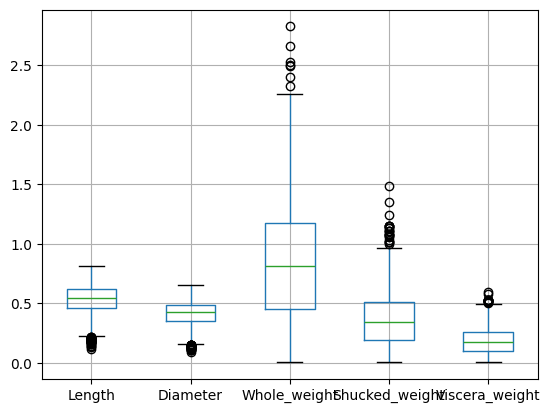

In [49]:
df1.boxplot(["Length", "Diameter", "Whole_weight", "Shucked_weight", "Viscera_weight"])

In [50]:
numeric_columns = ["Length", "Diameter", "Whole_weight", "Shucked_weight", "Viscera_weight"]

In [51]:
# outliers may disrupt the smooth analysis, so we will remove circled data points in box plot for our analysis.
# (this can be different for practitioner in reality)

In [52]:
q1 = df1[numeric_columns].quantile(0.25)
q3 = df1[numeric_columns].quantile(0.75)
iqr = q3 - q1

In [53]:
# whether each value is large outlier or not
large_outliers = df1[numeric_columns] > q3 + 1.5 * iqr
large_outliers

,Length,Diameter,Whole_weight,Shucked_weight,Viscera_weight
1,False,False,False,False,False
2,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
...,...,...,...,...,...
4167,False,False,False,False,False
4168,False,False,False,False,False
4169,False,False,False,False,False
4173,False,False,False,False,False


In [54]:
# the number of large outliers.

In [55]:
large_outliers.sum()

Length             0
Diameter           0
Whole_weight       7
Shucked_weight    23
Viscera_weight    14
dtype: int64

In [56]:
large_outliers.any(axis=1).sum()

30

In [57]:
# drop instances with any large outliers

In [58]:
# "~" inverts the true false

In [59]:
# True in this phrase will indicate the instances has no large outliers.
~large_outliers.any(axis=1)

1       True
2       True
4       True
5       True
6       True
        ... 
4167    True
4168    True
4169    True
4173    True
4176    True
Length: 2234, dtype: bool

In [60]:
df1 = df1[~large_outliers.any(axis=1)]

In [61]:
# repeat for small outliers.

In [62]:
small_outliers = df1[numeric_columns] < q1 - 1.5 * iqr
small_outliers

,Length,Diameter,Whole_weight,Shucked_weight,Viscera_weight
1,False,False,False,False,False
2,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
...,...,...,...,...,...
4167,False,False,False,False,False
4168,False,False,False,False,False
4169,False,False,False,False,False
4173,False,False,False,False,False


In [63]:
small_outliers.sum()

Length            33
Diameter          30
Whole_weight       0
Shucked_weight     0
Viscera_weight     0
dtype: int64

In [64]:
small_outliers.any(axis=1).sum()

34

In [65]:
df1 = df1[~small_outliers.any(axis=1)]
df1

,Length,Diameter,Whole_weight,Shucked_weight,Viscera_weight,Class_number_of_rings,Sex_I,Sex_M
1,0.350,0.265,0.2255,0.0995,0.0485,7,0,1
2,0.530,0.420,0.6770,0.2565,0.1415,9,0,0
4,0.330,0.255,0.2050,0.0895,0.0395,7,1,0
5,0.425,0.300,0.3515,0.1410,0.0775,8,1,0
6,0.530,0.415,0.7775,0.2370,0.1415,20,0,0
...,...,...,...,...,...,...,...,...
4167,0.500,0.380,0.5770,0.2690,0.1265,9,0,1
4168,0.515,0.400,0.6150,0.2865,0.1230,8,0,0
4169,0.520,0.385,0.7910,0.3750,0.1800,10,0,1
4173,0.590,0.440,0.9660,0.4390,0.2145,10,0,1


In [66]:
# before we move to learning a model. we can investigate correlations between features

In [67]:
df1.corr()

,Length,Diameter,Whole_weight,Shucked_weight,Viscera_weight,Class_number_of_rings,Sex_I,Sex_M
Length,1.000000,0.984750,0.940125,0.919374,0.912464,0.490042,-0.499087,0.193139
Diameter,0.984750,1.000000,0.938533,0.911734,0.906351,0.514930,-0.515648,0.192737
Whole_weight,0.940125,0.938533,1.000000,0.967221,0.965083,0.504408,-0.528328,0.215275
Shucked_weight,0.919374,0.911734,0.967221,1.000000,0.928079,0.378966,-0.498904,0.217786
Viscera_weight,0.912464,0.906351,0.965083,0.928079,1.000000,0.463349,-0.523452,0.208035
Class_number_of_rings,0.490042,0.514930,0.504408,0.378966,0.463349,1.000000,-0.397576,0.158594
Sex_I,-0.499087,-0.515648,-0.528328,-0.498904,-0.523452,-0.397576,1.000000,-0.505053
Sex_M,0.193139,0.192737,0.215275,0.217786,0.208035,0.158594,-0.505053,1.000000


In [68]:
# did which one show the strongest relationship with the target variable "Class_number_of_rings"?

In [69]:
df1.corr()["Class_number_of_rings"]

Length                   0.490042
Diameter                 0.514930
Whole_weight             0.504408
Shucked_weight           0.378966
Viscera_weight           0.463349
Class_number_of_rings    1.000000
Sex_I                   -0.397576
Sex_M                    0.158594
Name: Class_number_of_rings, dtype: float64

In [70]:
target_corr = df1.corr()["Class_number_of_rings"]

In [71]:
# get absolute values

In [72]:
target_corr.abs()

Length                   0.490042
Diameter                 0.514930
Whole_weight             0.504408
Shucked_weight           0.378966
Viscera_weight           0.463349
Class_number_of_rings    1.000000
Sex_I                    0.397576
Sex_M                    0.158594
Name: Class_number_of_rings, dtype: float64

In [73]:
# sort values with higher correlation first.

In [74]:
target_corr.abs().sort_values(ascending=False)

Class_number_of_rings    1.000000
Diameter                 0.514930
Whole_weight             0.504408
Length                   0.490042
Viscera_weight           0.463349
Sex_I                    0.397576
Shucked_weight           0.378966
Sex_M                    0.158594
Name: Class_number_of_rings, dtype: float64

In [75]:
# split training and test.

In [82]:
x = df1.drop(["Class_number_of_rings"], axis=1)
y = df1["Class_number_of_rings"]

In [83]:
x

,Length,Diameter,Whole_weight,Shucked_weight,Viscera_weight,Sex_I,Sex_M
1,0.350,0.265,0.2255,0.0995,0.0485,0,1
2,0.530,0.420,0.6770,0.2565,0.1415,0,0
4,0.330,0.255,0.2050,0.0895,0.0395,1,0
5,0.425,0.300,0.3515,0.1410,0.0775,1,0
6,0.530,0.415,0.7775,0.2370,0.1415,0,0
...,...,...,...,...,...,...,...
4167,0.500,0.380,0.5770,0.2690,0.1265,0,1
4168,0.515,0.400,0.6150,0.2865,0.1230,0,0
4169,0.520,0.385,0.7910,0.3750,0.1800,0,1
4173,0.590,0.440,0.9660,0.4390,0.2145,0,1


In [84]:
y

1        7
2        9
4        7
5        8
6       20
        ..
4167     9
4168     8
4169    10
4173    10
4176    12
Name: Class_number_of_rings, Length: 2170, dtype: int64

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [92]:
x_train

,Length,Diameter,Whole_weight,Shucked_weight,Viscera_weight,Sex_I,Sex_M
2429,0.340,0.255,0.2130,0.0810,0.0340,0,1
1654,0.595,0.460,0.8335,0.3770,0.1925,1,0
3806,0.425,0.310,0.3505,0.1645,0.0710,1,0
2204,0.420,0.345,0.4300,0.1750,0.0960,0,1
2360,0.545,0.440,0.7745,0.2985,0.1875,0,0
...,...,...,...,...,...,...,...
2272,0.635,0.510,1.5980,0.6535,0.2835,0,1
2436,0.515,0.400,0.8175,0.2515,0.1560,0,1
1032,0.650,0.520,1.6785,0.6665,0.3080,0,1
1186,0.685,0.540,1.7025,0.6640,0.3655,0,0


In [93]:
x_test

,Length,Diameter,Whole_weight,Shucked_weight,Viscera_weight,Sex_I,Sex_M
1067,0.340,0.265,0.2015,0.0900,0.0475,1,0
2874,0.425,0.340,0.3710,0.1500,0.0865,1,0
370,0.650,0.545,1.5660,0.6645,0.3455,0,0
2768,0.560,0.435,0.7200,0.3290,0.1030,1,0
2316,0.535,0.435,0.8915,0.3415,0.1770,0,1
...,...,...,...,...,...,...,...
4164,0.390,0.290,0.2845,0.1255,0.0635,1,0
3633,0.300,0.220,0.1195,0.0520,0.0155,1,0
1648,0.590,0.490,1.2070,0.5590,0.2350,0,1
183,0.620,0.475,1.0165,0.4355,0.2140,0,0


In [94]:
y_train

2429     9
1654     8
3806     8
2204     7
2360    11
        ..
2272    15
2436    23
1032    11
1186    14
1850     8
Name: Class_number_of_rings, Length: 1736, dtype: int64

In [95]:
y_test

1067     5
2874     8
370     16
2768    11
2316    13
        ..
4164     7
3633     5
1648    10
183     10
1518    11
Name: Class_number_of_rings, Length: 434, dtype: int64

In [ ]:
# for explaining stratify

In [97]:
df1_train, df1_test = train_test_split(df1, test_size=0.2, stratify=df1["Sex_I"])

In [98]:
# calculate the ratio of stratified column for both training and test set.

In [100]:
df1_train["Sex_I"].value_counts() / df1_train.shape[0]

Sex_I
0    0.697005
1    0.302995
Name: count, dtype: float64

In [101]:
df1_test["Sex_I"].value_counts() / df1_test.shape[0]

Sex_I
0    0.698157
1    0.301843
Name: count, dtype: float64